<a href="https://colab.research.google.com/github/adhin1234/ShapeAI_bootcampBWD/blob/main/Adhin_superstore_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Uploading data set to Google Colab:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving superstore_data.csv to superstore_data.csv


#Load the data set:

In [ ]:
data = pd.read_csv('superstore_data.csv')

#Performing data preprocessing:

Handle missing values

In [ ]:
data.dropna(inplace=True)

# Convert categorical variables to appropriate data types

In [ ]:
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Region'] = data['Region'].astype('category')

In [ ]:
print(data.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

# Create a new column for the total profit

In [ ]:
data['TotalProfit'] = data['Profit'] * data['Quantity']

# Verify the changes

In [ ]:
print(data.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  TotalProfit  
0      0.00   41.9136      83.8272  
1      0.00  219.5

#Exploratory Data Analysis (EDA)
# Descriptive statistics

In [ ]:
summary_stats = data.describe()
print(summary_stats)

        Postal Code         Sales     Quantity     Discount       Profit  \
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000   
mean   55190.379428    229.858001     3.789574     0.156203    28.656896   
std    32063.693350    623.245101     2.225110     0.206452   234.260108   
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000   
25%    23223.000000     17.280000     2.000000     0.000000     1.728750   
50%    56430.500000     54.490000     3.000000     0.200000     8.666500   
75%    90008.000000    209.940000     5.000000     0.200000    29.364000   
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000   

        TotalProfit  
count   9994.000000  
mean     143.128735  
std     1388.955607  
min   -32999.890000  
25%        3.208825  
50%       26.371800  
75%      114.702075  
max    64302.810000  


# Sales by Category

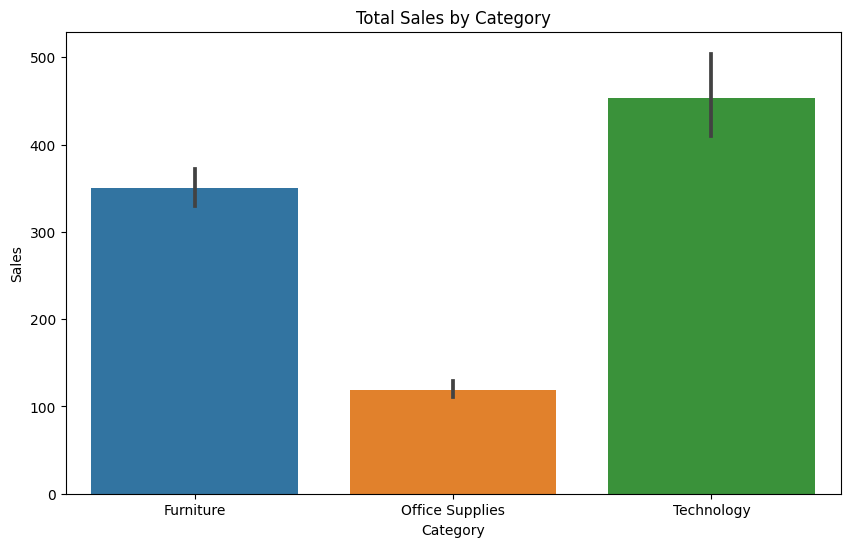

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Profit by Sub-Category

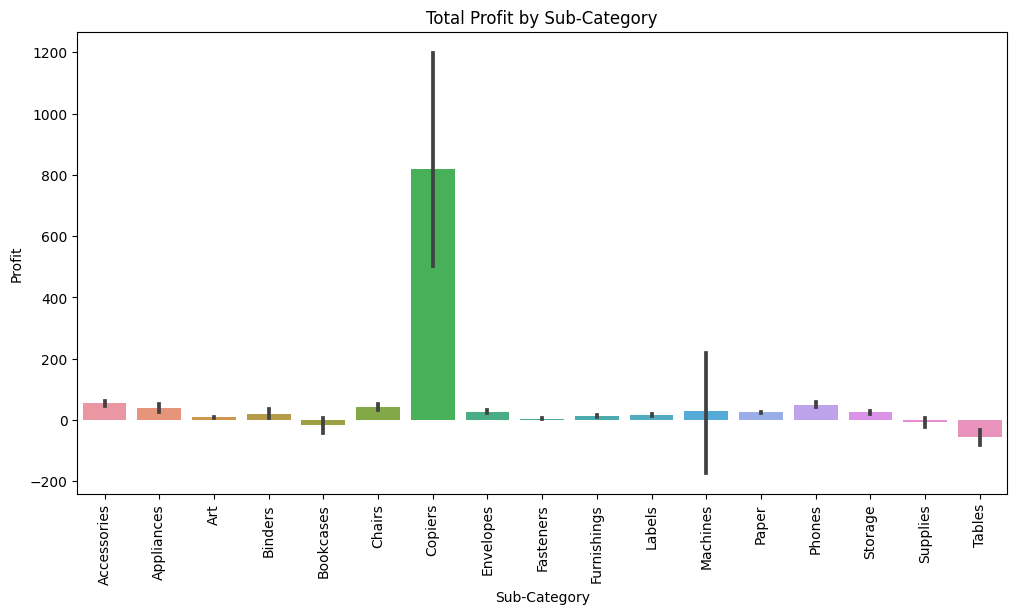

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=data)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

# Sales by Region

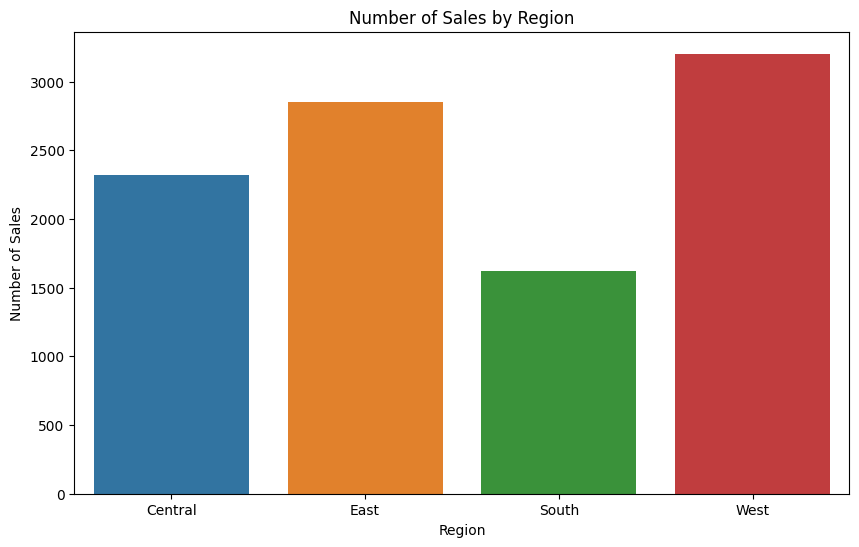

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=data)
plt.title('Number of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.show()

# Correlation Heatmap

<ipython-input-29-ca4c708503fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


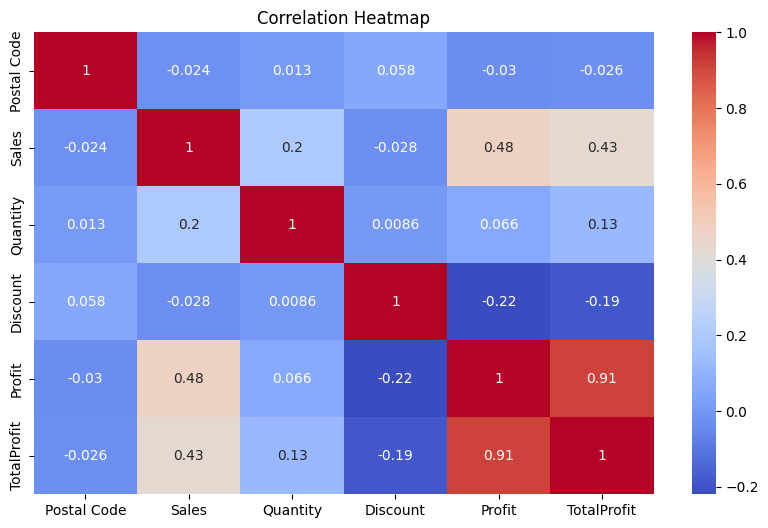

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Drop unnecessary columns for customer segmentation

In [ ]:
data_segmentation = data[['Sales', 'Profit', 'Quantity']]

# Perform data standardization

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segmentation)

# Customer Segmentation using K-means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
data['Segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


View the customer segments

In [ ]:
print(data['Segment'].value_counts())

1    6839
0    2935
3     209
2      11
Name: Segment, dtype: int64


# Group data by state and calculate total profit

In [ ]:
state_profit = data.groupby('State')['Profit'].sum().sort_values(ascending=False)


# Select the top 15 states with the most profit

In [ ]:
top_15_states = state_profit.head(15)

Plot the 15 states with the most profit

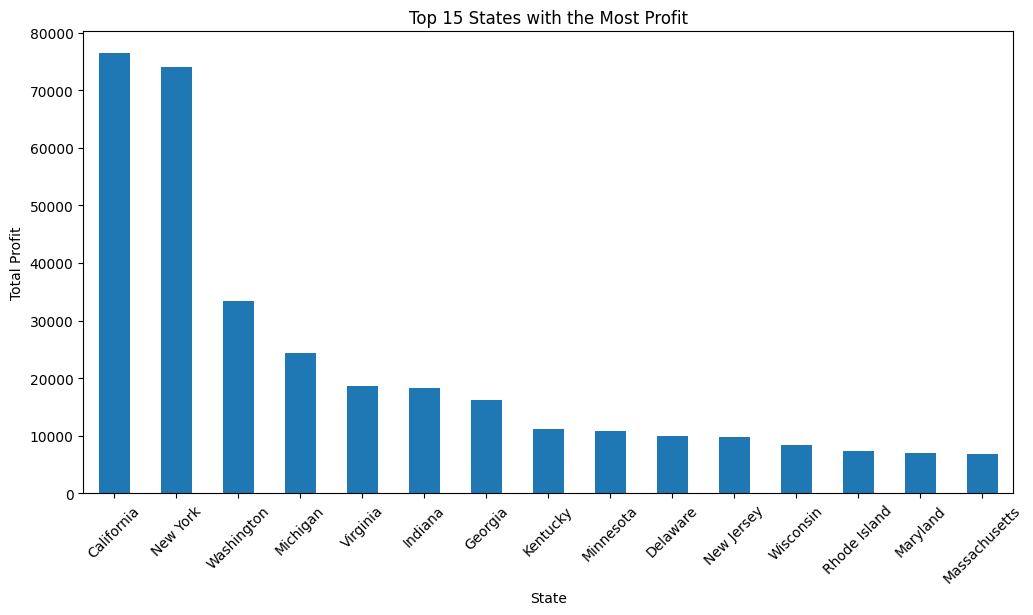

In [ ]:
plt.figure(figsize=(12, 6))
top_15_states.plot(kind='bar')
plt.title('Top 15 States with the Most Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

#CATEGORIES SOLD THE MOST

Count the number of sales by category

In [ ]:
category_counts = data['Category'].value_counts()

Plot the category sales

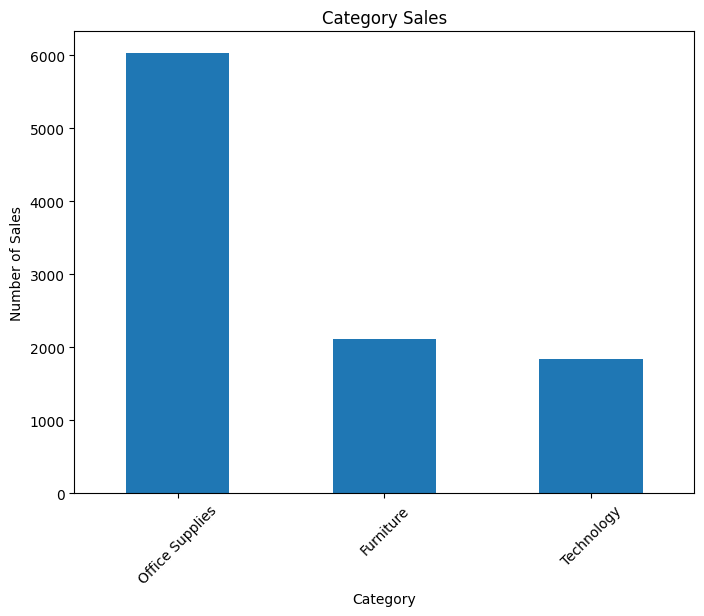

In [ ]:
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Category Sales')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

SUB-CATEGORY vs QUANTITY

# Group data by sub-category and calculate total quantity

In [ ]:
subcat_quantity = data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

Plot the sub-category vs quantity

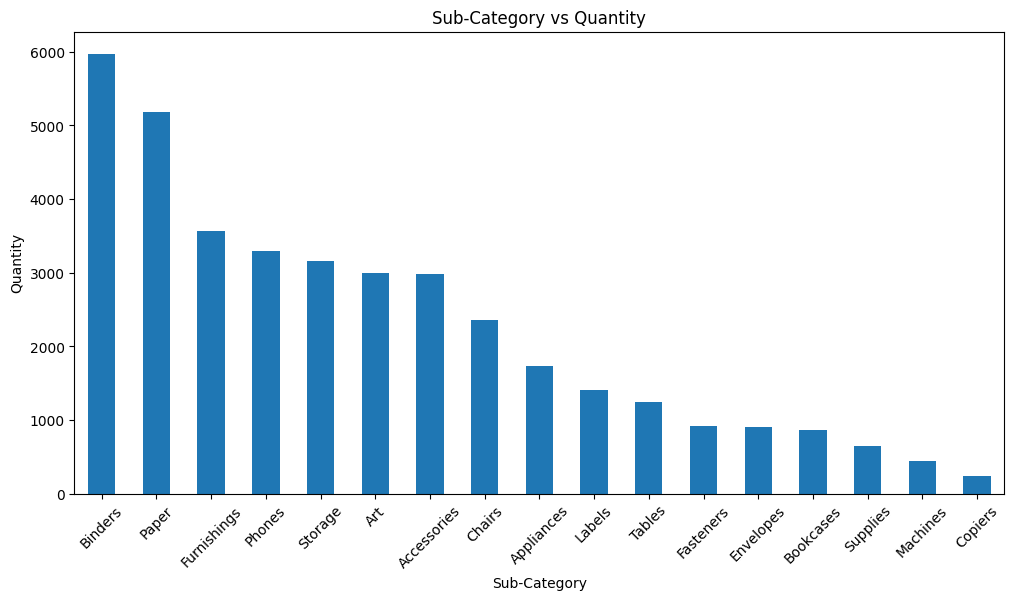

In [ ]:
plt.figure(figsize=(12, 6))
subcat_quantity.plot(kind='bar')
plt.title('Sub-Category vs Quantity')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

#CITY HAVING HIGHEST SALES

In [ ]:
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

Get the city with the highest sales

In [ ]:
city_highest_sales = city_sales.head(1)

 Plot the city with the highest sales

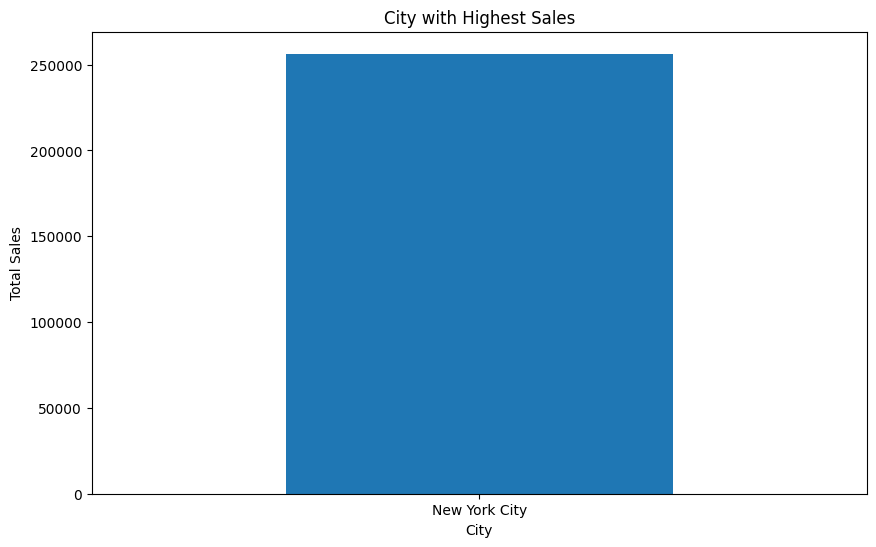

In [ ]:
plt.figure(figsize=(10, 6))
city_highest_sales.plot(kind='bar')
plt.title('City with Highest Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

#Quantity Sold by Region:

Calculate total quantity sold by region

In [ ]:
quantity_by_region = data.groupby('Region')['Quantity'].sum()

Plot the quantity sold by region

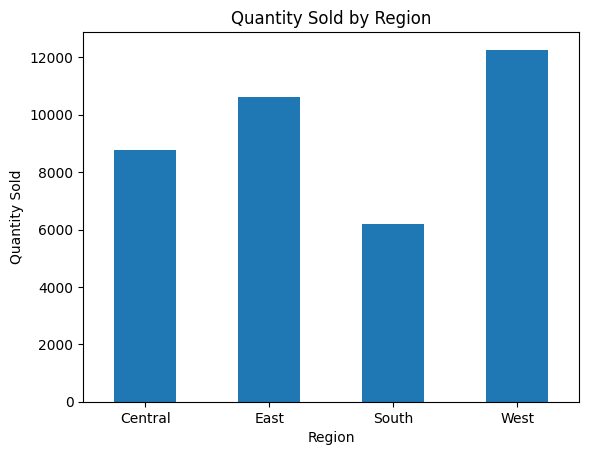

In [ ]:
quantity_by_region.plot(kind='bar')
plt.title('Quantity Sold by Region')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.show()

#Profit by Region and Category

Calculate total profit by region and category

In [ ]:
profit_by_region_category = data.groupby(['Region', 'Category'])['Profit'].sum().unstack()

Plot the profit by region and category using a heatmap

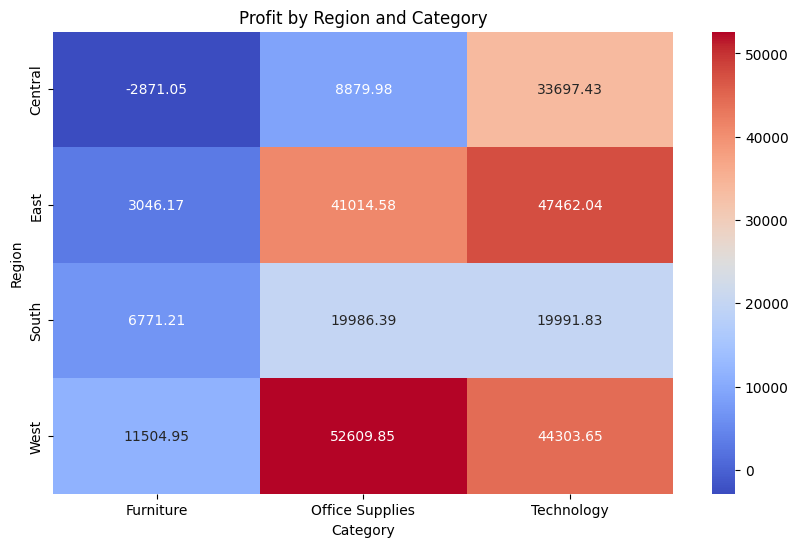

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(profit_by_region_category, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Profit by Region and Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

#Sales by Segment and Ship Mode:

 Calculate total sales by segment and ship mode

In [ ]:
sales_by_segment_shipmode = data.groupby(['Segment', 'Ship Mode'])['Sales'].sum().unstack()

Plot the sales by segment and ship mode using a stacked bar chart

<Figure size 1000x600 with 0 Axes>

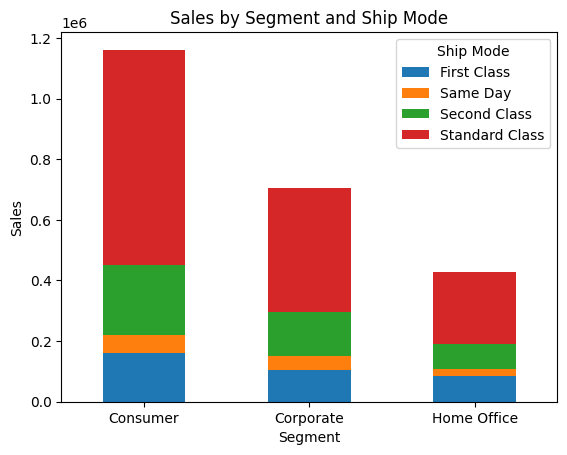

In [ ]:
plt.figure(figsize=(10, 6))
sales_by_segment_shipmode.plot(kind='bar', stacked=True)
plt.title('Sales by Segment and Ship Mode')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.legend(title='Ship Mode')
plt.show()

#Discount Analysis

Calculate the average discount by category

In [ ]:
avg_discount_category = data.groupby('Category')['Discount'].mean()

Plot the average discount by category using a bar graph

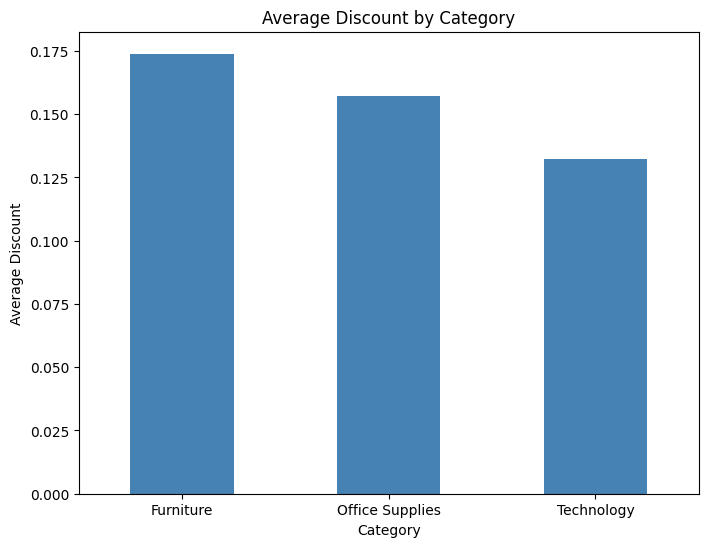

In [ ]:
plt.figure(figsize=(8, 6))
avg_discount_category.plot(kind='bar', color='steelblue')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=0)
plt.show()

#Profit by State

Group data by state and calculate total profit

In [ ]:
state_profit = data.groupby('State')['Profit'].sum()

Sort the states by profit in descending order

In [ ]:
state_profit = state_profit.sort_values(ascending=False)

Plot the profit by state using a horizontal bar graph

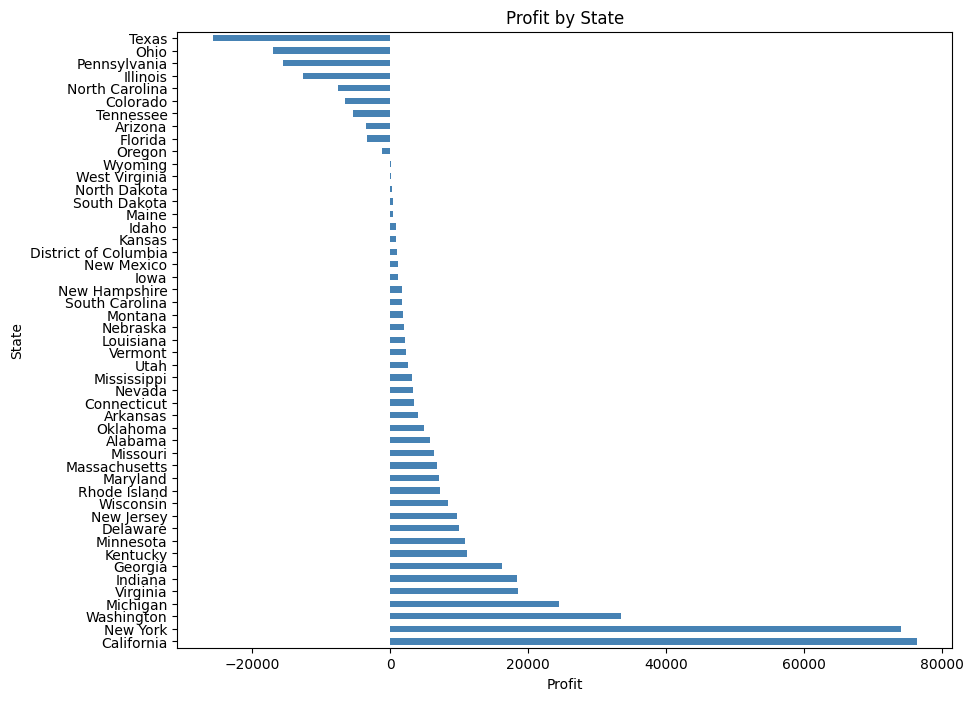

In [ ]:
plt.figure(figsize=(10, 8))
state_profit.plot(kind='barh', color='steelblue')
plt.title('Profit by State')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()